In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import base

RED = 'red'
BLUE = 'blue'

In [2]:
def get_number_of_fails_at_each_task():
    grouped_users =  base.get_dataset_and_group_by_user()
    number_of_target_fails_top = {}
    number_of_target_success_top = {}
    number_of_target_fails_som = {}
    number_of_target_success_som = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        # filter out not_used targets
        group_by_target = group.groupby('target_id')

        for target, target_group in group_by_target:
            if not target in number_of_target_fails_top.keys():
                number_of_target_fails_top[target] = 0
                number_of_target_success_top[target] = 0
                number_of_target_fails_som[target] = 0
                number_of_target_success_som[target] = 0
            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_id'] == target_group['target_id']].empty:
                    number_of_target_fails_top[target] += 1
                else:
                    number_of_target_success_top[target]+=1
            else:
                if target_group[target_group['guess_id'] == target_group['target_id']].empty:
                    number_of_target_fails_som[target] += 1
                else:
                    number_of_target_success_som[target]+=1

    return number_of_target_success_top,number_of_target_fails_top, \
           number_of_target_success_som,number_of_target_fails_som



def get_number_of_user_fails_at_each_task():
    grouped_users = base.get_dataset_and_group_by_user()
    number_of_target_fails_top = {}
    number_of_target_success_top = {}
    number_of_target_fails_som = {}
    number_of_target_success_som = {}
    for username, group in grouped_users:
        group = base.filter_out_mess(group)
        # filter out not_used targets
        group_by_target = group.groupby('target_id')
        if not username in number_of_target_fails_top.keys():
            number_of_target_fails_top[username] = 0
            number_of_target_success_top[username] = 0
            number_of_target_fails_som[username] = 0
            number_of_target_success_som[username] = 0
        for target, target_group in group_by_target:
            if target_group.iloc[0]["display_type"] == "top":
                if target_group[target_group['guess_id'] == target_group['target_id']].empty:
                    number_of_target_fails_top[username] += 1
                else:
                    number_of_target_success_top[username] += 1
            else:
                if target_group[target_group['guess_id'] == target_group['target_id']].empty:
                    number_of_target_fails_som[username] += 1
                else:
                    number_of_target_success_som[username] += 1

    return number_of_target_success_top, number_of_target_fails_top, \
           number_of_target_success_som, number_of_target_fails_som


Corelation for user_success vs. rank:
Spearman:
           x         y
x  1.000000 -0.032893
y -0.032893  1.000000
Pearson:
           x         y
x  1.000000 -0.051573
y -0.051573  1.000000


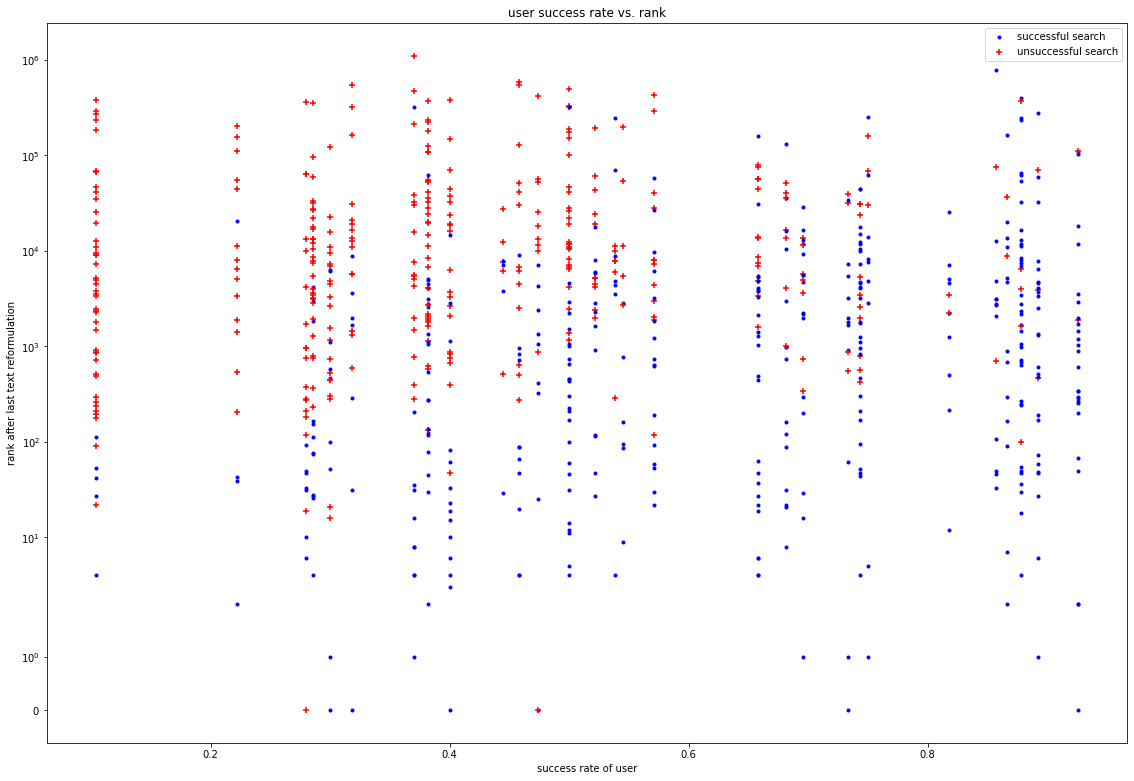

<Figure size 1440x1440 with 0 Axes>

In [5]:

%matplotlib inline
fig, ax = plt.subplots()

success_top, fail_top, success_som, fail_som = get_number_of_user_fails_at_each_task()

success_rate = {}

for key, value in success_top.items():
    success_rate[key] = (success_som[key] + success_top[key]) / (
                success_som[key] + success_top[key] + fail_top[key] + fail_som[key])

first_fail = True
first_success = True
x_corr = []
y_corr = []
grouped_users = base.get_dataset_and_group_by_user()
for username, group in grouped_users:
    group = base.filter_out_mess(group)
    # filter out not_used targets
    group_by_target = group.groupby('target_id')
    for target, target_group in group_by_target:
        text_formulations = target_group[target_group['type'] == 'text'].reset_index(drop=True)
        last_text_formulation = text_formulations.sort_values("timestamp").tail(1)
        if last_text_formulation.empty:
            continue
        user = last_text_formulation['user'].iloc[0]
        target_rank = last_text_formulation['target_rank'].iloc[0]

        x = success_rate[user]
        y = float(target_rank)
        x_corr.append(x)
        y_corr.append(y)
        if target_group[target_group['guess_id'] == target_group['target_id']].empty:
            if first_fail:
                plt.scatter(x, y, c=RED, marker='+', label="unsuccessful search")
                first_fail = False
            else:
                plt.scatter(x, y, c=RED, marker='+')

        else:
            if first_success:
                plt.scatter(x, y, c=BLUE, marker='.', label="successful search")
                first_success = False
            else:
                plt.scatter(x, y, c=BLUE, marker='.')
d = {'x': x_corr, 'y': y_corr}
df = pd.DataFrame(data=d)
print("\nCorelation for user_success vs. rank:")
print("Spearman:\n", df.corr(method="spearman"))
print("Pearson:\n", df.corr(method="pearson"))

plt.legend()
plt.xlabel('success rate of user')
plt.ylabel('rank after last text reformulation')
plt.title("user success rate vs. rank")

# plt.ylim(ymax=50000, ymin=0)
plt.yscale('symlog')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter
plt.show()


Corelation for target_success vs. rank:
Spearman:
           x         y
x  1.000000 -0.506102
y -0.506102  1.000000
Pearson:
           x         y
x  1.000000 -0.188549
y -0.188549  1.000000


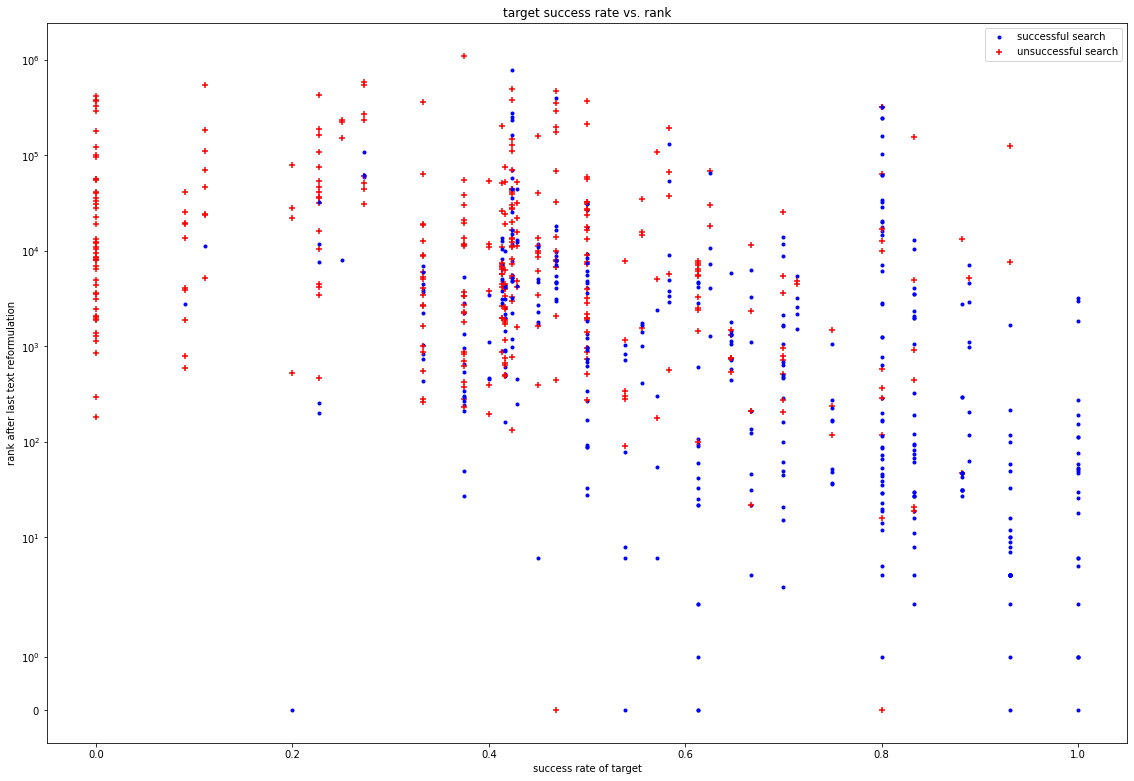

<Figure size 1440x1440 with 0 Axes>

In [6]:
%matplotlib inline
fig, ax = plt.subplots()

success_top, fail_top, success_som, fail_som = get_number_of_fails_at_each_task()

success_rate = {}

for key, value in success_top.items():
    success_rate[key] = (success_som[key] + success_top[key]) / (
                success_som[key] + success_top[key] + fail_top[key] + fail_som[key])
first_success = True
first_fail = True
x_corr = []
y_corr = []
grouped_users = base.get_dataset_and_group_by_user()
for username, group in grouped_users:
    group = base.filter_out_mess(group)
    # filter out not_used targets
    group_by_target = group.groupby('target_id')
    for target, target_group in group_by_target:
        text_formulations = target_group[target_group['type'] == 'text'].reset_index(drop=True)
        last_text_formulation = text_formulations.sort_values("timestamp").tail(1)
        if last_text_formulation.empty:
            continue
        target_id = last_text_formulation['target_id'].iloc[0]
        target_rank = last_text_formulation['target_rank'].iloc[0]
        x = success_rate[target_id]
        y = float(target_rank)
        x_corr.append(x)
        y_corr.append(y)
        if target_group[target_group['guess_id'] == target_group['target_id']].empty:
            if first_fail:
                plt.scatter(x,y, c=RED, marker='+', label="unsuccessful search")
                first_fail = False
            else:
                plt.scatter(x,y, c=RED, marker='+')

        else:
            if first_success:
                plt.scatter(x,y, c=BLUE, marker='.', label="successful search")
                first_success = False
            else:
                plt.scatter(x,y, c=BLUE, marker='.')

d = {'x': x_corr, 'y': y_corr}
df = pd.DataFrame(data=d)
print("\nCorelation for target_success vs. rank:")
print("Spearman:\n", df.corr(method="spearman"))
print("Pearson:\n", df.corr(method="pearson"))

plt.xlabel('success rate of target')
plt.ylabel('rank after last text reformulation')
plt.title("target success rate vs. rank")
plt.legend()
plt.yscale('symlog')

plt.figure(figsize=(20,20))
fig.subplots_adjust(0,0,2.5,2.5) # make plots bigger in Jupyter

plt.show()